In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot,pylab as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import r2_score,roc_auc_score,adjusted_rand_score
import statsmodels.formula.api as sm
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv("Kern_County bond dataset 2.csv")
df

,CDIAC Number,Issuer,Issuance Documents,Sold Status,Sale Date,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Reportable Next Fiscal Year,ADTR Last Reported Year,...,Placement Agent,Financial Advisor,Co-Financial Advisor,Bond Counsel,Co-Bond Counsel,Disclosure Counsel,Borrower Counsel,Trustee,Issue Costs Pct of Principal Amt,Total Issuance Costs
0,2022-1204,Richland School District,submited,SOLD,07/14/2022 12:00:00 AM,REPORTED,PENDING,Y,Yes,NaN,...,Raymond James & Associates Inc,California Financial Services,NaN,Norton Rose Fulbright US LLP,NaN,NaN,NaN,U.S. Bank National Association,3.67,170000.00
1,1996-1769,Delano Joint Union High School District (CSCRPA),Pending,SOLD,12-11-1996 00:00,No Report,N/A,N,NaN,NaN,...,NaN,NaN,NaN,"Orrick, Herrington & Sutcliffe LLP",NaN,NaN,NaN,First Trust of California NA,0.00,0.00
2,2022-1205,Richland School District,submited,SOLD,07/14/2022 12:00:00 AM,REPORTED,PENDING,Y,Yes,NaN,...,Raymond James & Associates Inc,California Public Finance,NaN,Norton Rose Fulbright US LLP,NaN,NaN,NaN,U.S. Bank National Association,10.07,135000.00
3,2015-1538,Bakersfield,submited,SOLD,06-10-2015 00:00,No Report,N/A,N,NaN,NaN,...,NaN,Fieldman Rolapp & Associates Inc,NaN,"Orrick, Herrington & Sutcliffe LLP",NaN,Goodwin Procter LLP,NaN,U.S. Bank National Association,1.78,50843.91
4,2001-0720,Kern County Board of Education (CSCRPA),Pending,SOLD,06/21/2001 12:00:00 AM,No Report,N/A,N,NaN,NaN,...,NaN,NaN,NaN,"Orrick, Herrington & Sutcliffe LLP",NaN,NaN,NaN,US Bank Corporate Trust Services,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2008-1301,Mojave Unified School District,submited,SOLD,01/15/2009 12:00:00 AM,No Report,N/A,N,NaN,NaN,...,NaN,Caldwell Flores Winters Inc / CFW,NaN,Kronick Moskovitz Tiedemann & Girard,NaN,NaN,NaN,U.S. Bank National Association,3.59,341516.05
1196,1994-1262,Kern High School District,Pending,SOLD,07/28/1994 12:00:00 AM,No Report,N/A,N,NaN,NaN,...,NaN,Dale Scott & Associates Inc,NaN,Jones Hall Hill & White,NaN,NaN,NaN,Kern County,0.00,0.00
1197,1988-0037,Bakersfield,Pending,SOLD,04/19/1988 12:00:00 AM,No Report,N/A,N,NaN,NaN,...,NaN,NaN,NaN,Jackson Hargrove Hillison & Emerich,NaN,NaN,NaN,NaN,0.00,148460.00
1198,2003-0562,North of River Sanitary District No 1,submited,SOLD,05/15/2003 12:00:00 AM,No Report,N/A,N,NaN,NaN,...,NaN,NaN,NaN,Jones Hall A Professional Law Corp,NaN,NaN,NaN,U.S. Bank National Association,0.00,118490.00


In [3]:
df.shape

(1200, 55)

In [4]:
df.size

66000

In [5]:
df.describe()

,Principal Amount,New Money,Refunding Amount,Net Issue Discount/Premium,TIC Interest Rate,NIC Interest Rate,Lender,Co-Financial Advisor,Co-Bond Counsel,Issue Costs Pct of Principal Amt,Total Issuance Costs
count,1.200000e+03,1.200000e+03,1.081000e+03,9.190000e+02,559.000000,847.000000,0.0,0.0,0.0,1198.000000,1.198000e+03
mean,1.250888e+07,8.618718e+06,4.318402e+06,2.385701e+05,3.797231,3.989185,NaN,NaN,NaN,1.262304,1.599789e+05
std,2.665435e+07,2.256718e+07,1.655262e+07,1.180353e+06,3.472626,2.679650,NaN,NaN,NaN,2.195228,2.673541e+05
min,1.000000e+04,-1.309768e+06,0.000000e+00,-6.337712e+06,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00
25%,2.000000e+06,5.000000e+05,0.000000e+00,0.000000e+00,2.577500,2.312000,NaN,NaN,NaN,0.000000,0.000000e+00
50%,4.563000e+06,2.682260e+06,0.000000e+00,0.000000e+00,3.687000,3.851000,NaN,NaN,NaN,0.030000,6.511163e+04
75%,1.088905e+07,6.960277e+06,1.768974e+06,6.706200e+04,4.777000,5.709500,NaN,NaN,NaN,1.950000,2.183755e+05
max,2.381771e+08,2.278184e+08,2.381771e+08,2.552913e+07,69.604000,28.271000,NaN,NaN,NaN,30.420000,3.114696e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1200 entries, 0 to 1199

Data columns (total 55 columns):

 #   Column                             Non-Null Count  Dtype  

---  ------                             --------------  -----  

 0   CDIAC Number                       1200 non-null   object 

 1   Issuer                             1200 non-null   object 

 2   Issuance Documents                 1200 non-null   object 

 3   Sold Status                        1200 non-null   object 

 4   Sale Date                          1200 non-null   object 

 5   ADTR Report                        1200 non-null   object 

 6   ADTR Filing Status                 1200 non-null   object 

 7   ADTR Reportable                    1200 non-null   object 

 8   ADTR Reportable Next Fiscal Year   151 non-null    object 

 9   ADTR Last Reported Year            117 non-null    object 

 10  Debt Policy                        158 non-null    object 

 11  Issuer County                      1200 

In [7]:
df.nunique()

CDIAC Number                         1200
Issuer                                178
Issuance Documents                      3
Sold Status                             2
Sale Date                             833
ADTR Report                             3
ADTR Filing Status                      4
ADTR Reportable                         2
ADTR Reportable Next Fiscal Year        1
ADTR Last Reported Year                 4
Debt Policy                             2
Issuer County                           1
MKR Authority                           2
Local Obligation                        2
MKR CDIAC Number                        8
Issuer Group                            6
Issuer Type                            23
Project Name                          403
Principal Amount                      882
New Money                             745
Refunding Amount                      301
Net Issue Discount/Premium            342
Environmental/Social Impact Bonds       2
Debt Type                         

## Checking for Null Values

In [8]:
df.isnull().sum()

CDIAC Number                            0
Issuer                                  0
Issuance Documents                      0
Sold Status                             0
Sale Date                               0
ADTR Report                             0
ADTR Filing Status                      0
ADTR Reportable                         0
ADTR Reportable Next Fiscal Year     1049
ADTR Last Reported Year              1083
Debt Policy                          1042
Issuer County                           0
MKR Authority                           0
Local Obligation                        0
MKR CDIAC Number                     1192
Issuer Group                            0
Issuer Type                             0
Project Name                          188
Principal Amount                        0
New Money                               0
Refunding Amount                      119
Net Issue Discount/Premium            281
Environmental/Social Impact Bonds       9
Debt Type                         

### Replacing Null Value

In [9]:
mode= df["ADTR Reportable Next Fiscal Year"].mode().values[0]
df["ADTR Reportable Next Fiscal Year"]=df["ADTR Reportable Next Fiscal Year"].fillna(mode)

In [10]:
mode= df["ADTR Last Reported Year"].mode().values[0]
df["ADTR Last Reported Year"]=df["ADTR Last Reported Year"].fillna(mode)

In [11]:
mode= df["Debt Policy"].mode().values[0]
df["Debt Policy"]=df["Debt Policy"].fillna(mode)

In [12]:
mode= df["MKR CDIAC Number"].mode().values[0]
df["MKR CDIAC Number"]=df["MKR CDIAC Number"].fillna(mode)

In [13]:
mode= df["Project Name"].mode().values[0]
df["Project Name"]=df["Project Name"].fillna(mode)

In [14]:
mean= df["Refunding Amount"].mean()
df["Refunding Amount"]=df["Refunding Amount"].fillna(mean)

In [15]:
mean= df["Net Issue Discount/Premium"].mean()
df["Net Issue Discount/Premium"]=df["Net Issue Discount/Premium"].fillna(mean)

In [16]:
mode= df["Environmental/Social Impact Bonds"].mode().values[0]
df["Environmental/Social Impact Bonds"]=df["Environmental/Social Impact Bonds"].fillna(mode)

In [17]:
mode= df["Purpose"].mode().values[0]
df["Purpose"]=df["Purpose"].fillna(mode)

In [18]:
mode= df["Source of Repayment"].mode().values[0]
df["Source of Repayment"]=df["Source of Repayment"].fillna(mode)

In [19]:
mean= df["TIC Interest Rate"].mean()
df["TIC Interest Rate"]=df["TIC Interest Rate"].fillna(mean)

In [20]:
mean= df["NIC Interest Rate"].mean()
df["NIC Interest Rate"]=df["NIC Interest Rate"].fillna(mean)

In [21]:
mode= df["Interest Type"].mode().values[0]
df["Interest Type"]=df["Interest Type"].fillna(mode)

In [22]:
mode= df["Other Interest Type"].mode().values[0]
df["Other Interest Type"]=df["Other Interest Type"].fillna(mode)

In [23]:
mode= df["First Optional Call Date"].mode().values[0]
df["First Optional Call Date"]=df["First Optional Call Date"].fillna(mode)

In [24]:
mode= df["Final Maturity Date"].mode().values[0]
df["Final Maturity Date"]=df["Final Maturity Date"].fillna(mode)

In [25]:
mode= df["CAB Flag"].mode().values[0]
df["CAB Flag"]=df["CAB Flag"].fillna(mode)

In [26]:
mode= df["S and P Rating"].mode().values[0]
df["S and P Rating"]=df["S and P Rating"].fillna(mode)

In [27]:
mode= df["Moody Rating"].mode().values[0]
df["Moody Rating"]=df["Moody Rating"].fillna(mode)

In [28]:
mode= df["Fitch Rating"].mode().values[0]
df["Fitch Rating"]=df["Fitch Rating"].fillna(mode)

In [29]:
mode= df["Other Rating"].mode().values[0]
df["Other Rating"]=df["Other Rating"].fillna(mode)

In [30]:
mode= df["Guarantor Flag"].mode().values[0]
df["Guarantor Flag"]=df["Guarantor Flag"].fillna(mode)

In [31]:
mode= df["Guarantor"].mode().values[0]
df["Guarantor"]=df["Guarantor"].fillna(mode)

In [32]:
mode= df["Underwriter"].mode().values[0]
df["Underwriter"]=df["Underwriter"].fillna(mode)

In [33]:
mean= df["Lender"].mean()
df["Lender"]=df["Lender"].fillna(mean)

In [34]:
mode= df["Purchaser"].mode().values[0]
df["Purchaser"]=df["Purchaser"].fillna(mode)

In [35]:
mode= df["Placement Agent"].mode().values[0]
df["Placement Agent"]=df["Placement Agent"].fillna(mode)

In [36]:
mode= df["Financial Advisor"].mode().values[0]
df["Financial Advisor"]=df["Financial Advisor"].fillna(mode)

In [37]:
mean= df["Co-Financial Advisor"].mean()
df["Co-Financial Advisor"]=df["Co-Financial Advisor"].fillna(mean)

In [38]:
mode = df["Bond Counsel"].mode().values[0]
df["Bond Counsel"]=df["Bond Counsel"].fillna(mode)

In [39]:
mode = df["Disclosure Counsel"].mode().values[0]
df["Disclosure Counsel"]=df["Disclosure Counsel"].fillna(mode)

In [40]:
mode = df["Trustee"].mode().values[0]
df["Trustee"]=df["Trustee"].fillna(mode)

In [41]:
mean= df["Issue Costs Pct of Principal Amt"].mean()
df["Issue Costs Pct of Principal Amt"]=df["Issue Costs Pct of Principal Amt"].fillna(mean)

In [42]:
mean= df["Total Issuance Costs"].mean()
df["Total Issuance Costs"]=df["Total Issuance Costs"].fillna(mean)

In [43]:
df.isnull().sum()

CDIAC Number                            0
Issuer                                  0
Issuance Documents                      0
Sold Status                             0
Sale Date                               0
ADTR Report                             0
ADTR Filing Status                      0
ADTR Reportable                         0
ADTR Reportable Next Fiscal Year        0
ADTR Last Reported Year                 0
Debt Policy                             0
Issuer County                           0
MKR Authority                           0
Local Obligation                        0
MKR CDIAC Number                        0
Issuer Group                            0
Issuer Type                             0
Project Name                            0
Principal Amount                        0
New Money                               0
Refunding Amount                        0
Net Issue Discount/Premium              0
Environmental/Social Impact Bonds       0
Debt Type                         

### As we can see that there are not a single value in column like lender,co-financial advisor,co-bond counsel,borrower counsel (only have 2 values). so we can drop this columns

# Droping the columns

In [44]:
df.drop(columns=["CDIAC Number","Issuer","MKR CDIAC Number","Fitch Rating","Other Rating","Lender","Co-Financial Advisor","Co-Bond Counsel","Borrower Counsel","Issuer County","TIC Interest Rate","NIC Interest Rate","Net Issue Discount/Premium","Sale Date","Project Name","Trustee","ADTR Reportable Next Fiscal Year"],inplace=True)

In [45]:
df

,Issuance Documents,Sold Status,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Last Reported Year,Debt Policy,MKR Authority,Local Obligation,Issuer Group,...,Sale Type (Comp/Neg),Private Placement Flag,Underwriter,Purchaser,Placement Agent,Financial Advisor,Bond Counsel,Disclosure Counsel,Issue Costs Pct of Principal Amt,Total Issuance Costs
0,submited,SOLD,REPORTED,PENDING,Y,06/30/2022 12:00:00 AM,Y,NO,NO,K-14 Schools,...,Neg,YES,Piper Jaffray & Co,First Foundation Public Finance Trust,Raymond James & Associates Inc,California Financial Services,Norton Rose Fulbright US LLP,Jones Hall A Professional Law Corp,3.67,170000.00
1,Pending,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,K-14 Schools,...,Neg,NO,Piper Jaffray Incorporated,City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Fieldman Rolapp & Associates Inc,"Orrick, Herrington & Sutcliffe LLP",Jones Hall A Professional Law Corp,0.00,0.00
2,submited,SOLD,REPORTED,PENDING,Y,06/30/2022 12:00:00 AM,Y,NO,NO,K-14 Schools,...,Neg,YES,Piper Jaffray & Co,First Foundation Public Finance Trust,Raymond James & Associates Inc,California Public Finance,Norton Rose Fulbright US LLP,Jones Hall A Professional Law Corp,10.07,135000.00
3,submited,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,Cities,...,Neg,NO,Stifel Nicolaus & Company Inc,City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Fieldman Rolapp & Associates Inc,"Orrick, Herrington & Sutcliffe LLP",Goodwin Procter LLP,1.78,50843.91
4,Pending,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,Counties,...,Neg,NO,US Bancorp Piper Jaffray,City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Fieldman Rolapp & Associates Inc,"Orrick, Herrington & Sutcliffe LLP",Jones Hall A Professional Law Corp,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,submited,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,K-14 Schools,...,Neg,NO,Banc of America Securities,City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Caldwell Flores Winters Inc / CFW,Kronick Moskovitz Tiedemann & Girard,Jones Hall A Professional Law Corp,3.59,341516.05
1196,Pending,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,K-14 Schools,...,Comp,NO,Oppenheimer & Company Inc,City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Dale Scott & Associates Inc,Jones Hall Hill & White,Jones Hall A Professional Law Corp,0.00,0.00
1197,Pending,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,Cities,...,Neg,NO,M L Stern & Company,City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Fieldman Rolapp & Associates Inc,Jackson Hargrove Hillison & Emerich,Jones Hall A Professional Law Corp,0.00,148460.00
1198,submited,SOLD,No Report,N/A,N,06/30/2022 12:00:00 AM,Y,NO,NO,Special Districts,...,Neg,NO,"Brandis Tallman, A Division of Oppenheimer & C...",City National Bank,"Brandis Tallman, A Division of Oppenheimer & C...",Fieldman Rolapp & Associates Inc,Jones Hall A Professional Law Corp,Jones Hall A Professional Law Corp,0.00,118490.00


# looking for Duplicate Values

In [46]:
df.duplicated().sum()

2

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

# looking for Outliers

<AxesSubplot:xlabel='Refunding Amount'>

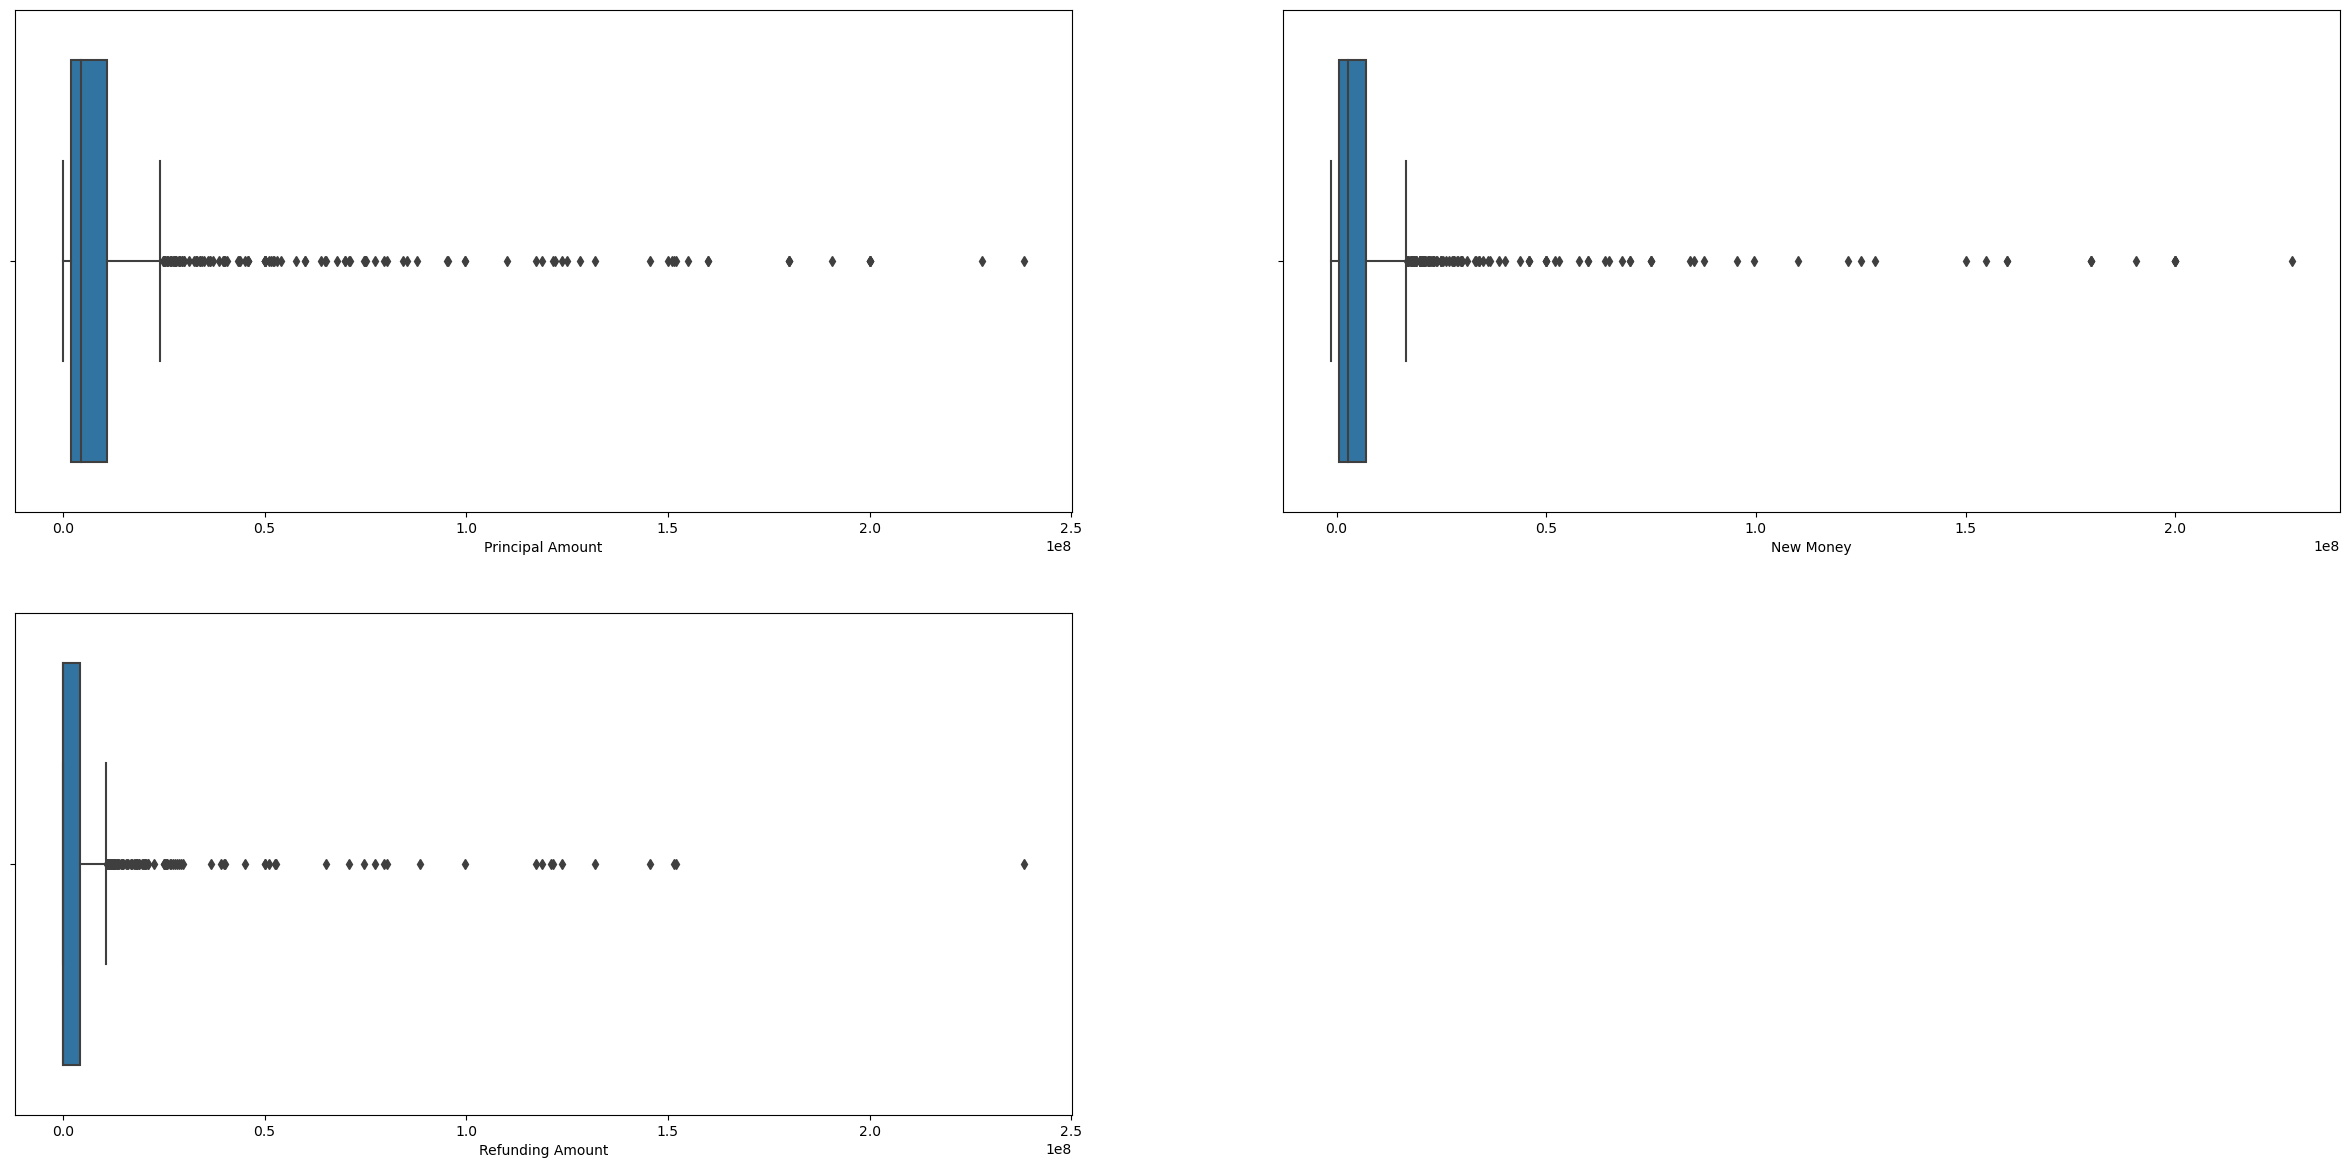

In [49]:

plt.figure(figsize=(30,30))
plt.subplot(4,2,1)
sns.boxplot(df["Principal Amount"])
plt.subplot(4,2,2)
sns.boxplot(df["New Money"])
plt.subplot(4,2,3)
sns.boxplot(df["Refunding Amount"])



<AxesSubplot:xlabel='Total Issuance Costs'>

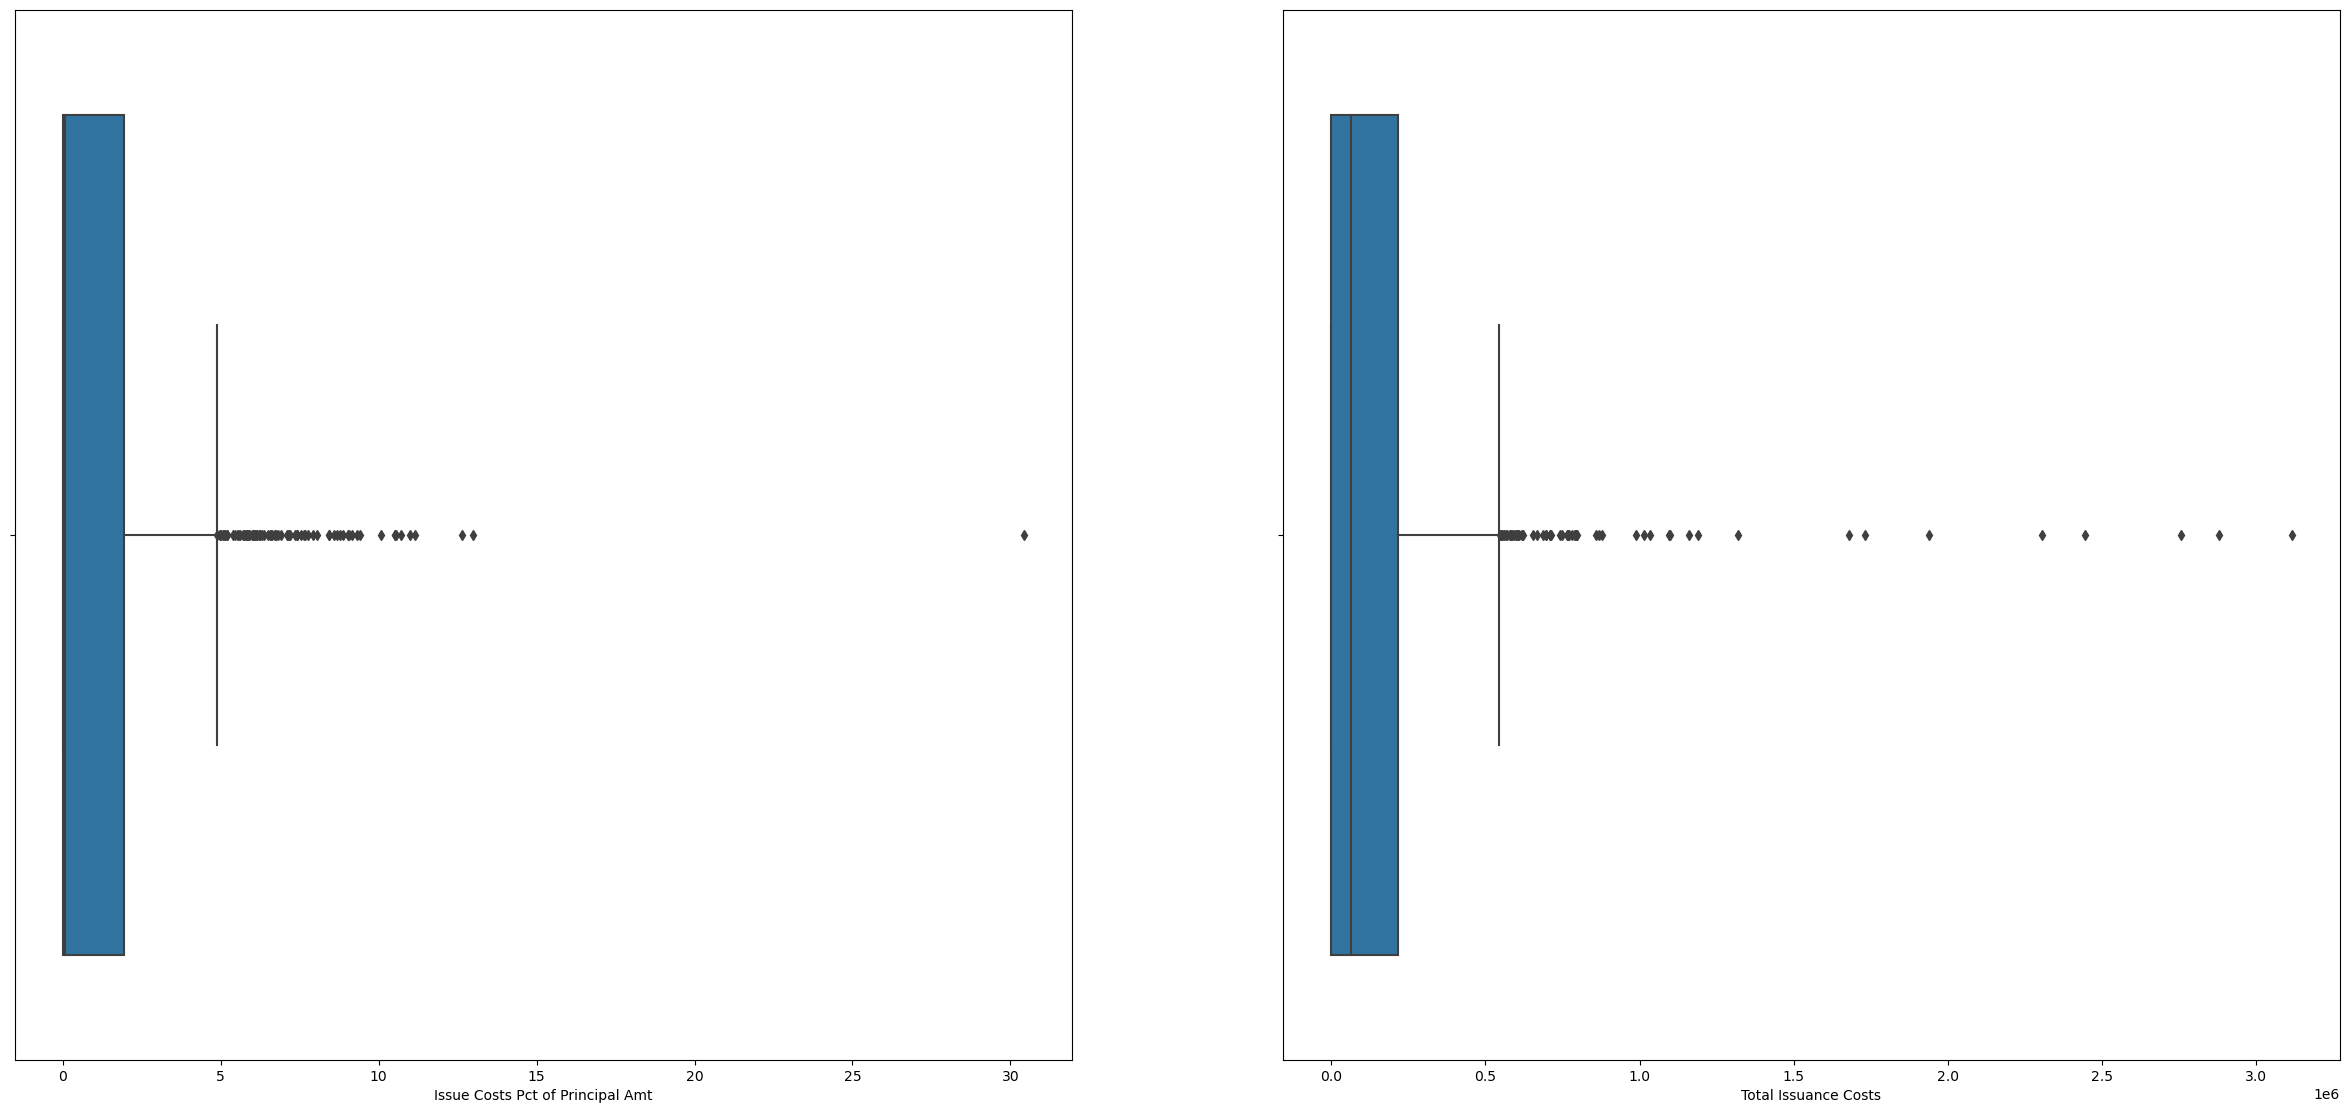

In [50]:
plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
sns.boxplot(df["Issue Costs Pct of Principal Amt"])
plt.subplot(2,2,2)
sns.boxplot(df["Total Issuance Costs"])


### Treating the outliers

In [51]:
mean = df['Principal Amount'].mean()
median = df['Principal Amount'].median()
df['Principal Amount'] = np.where(df['Principal Amount'] > median,mean, df['Principal Amount'])

In [52]:
mean = df['New Money'].mean()
median = df['New Money'].median()
df['New Money'] = np.where(df['New Money'] > median,mean, df['New Money'])

In [53]:
mean = df['Refunding Amount'].mean()
median = df['Refunding Amount'].median()
df['Refunding Amount'] = np.where(df['Refunding Amount'] > median,mean, df['Refunding Amount'])

In [54]:
mean = df['Issue Costs Pct of Principal Amt'].mean()
median = df['Issue Costs Pct of Principal Amt'].median()
df['Issue Costs Pct of Principal Amt'] = np.where(df['Issue Costs Pct of Principal Amt'] > median,mean, df['Issue Costs Pct of Principal Amt'])

In [55]:
mean = df['Total Issuance Costs'].mean()
median = df['Total Issuance Costs'].median()
df['Total Issuance Costs'] = np.where(df['Total Issuance Costs'] > median,mean, df['Total Issuance Costs'])

<AxesSubplot:xlabel='Refunding Amount'>

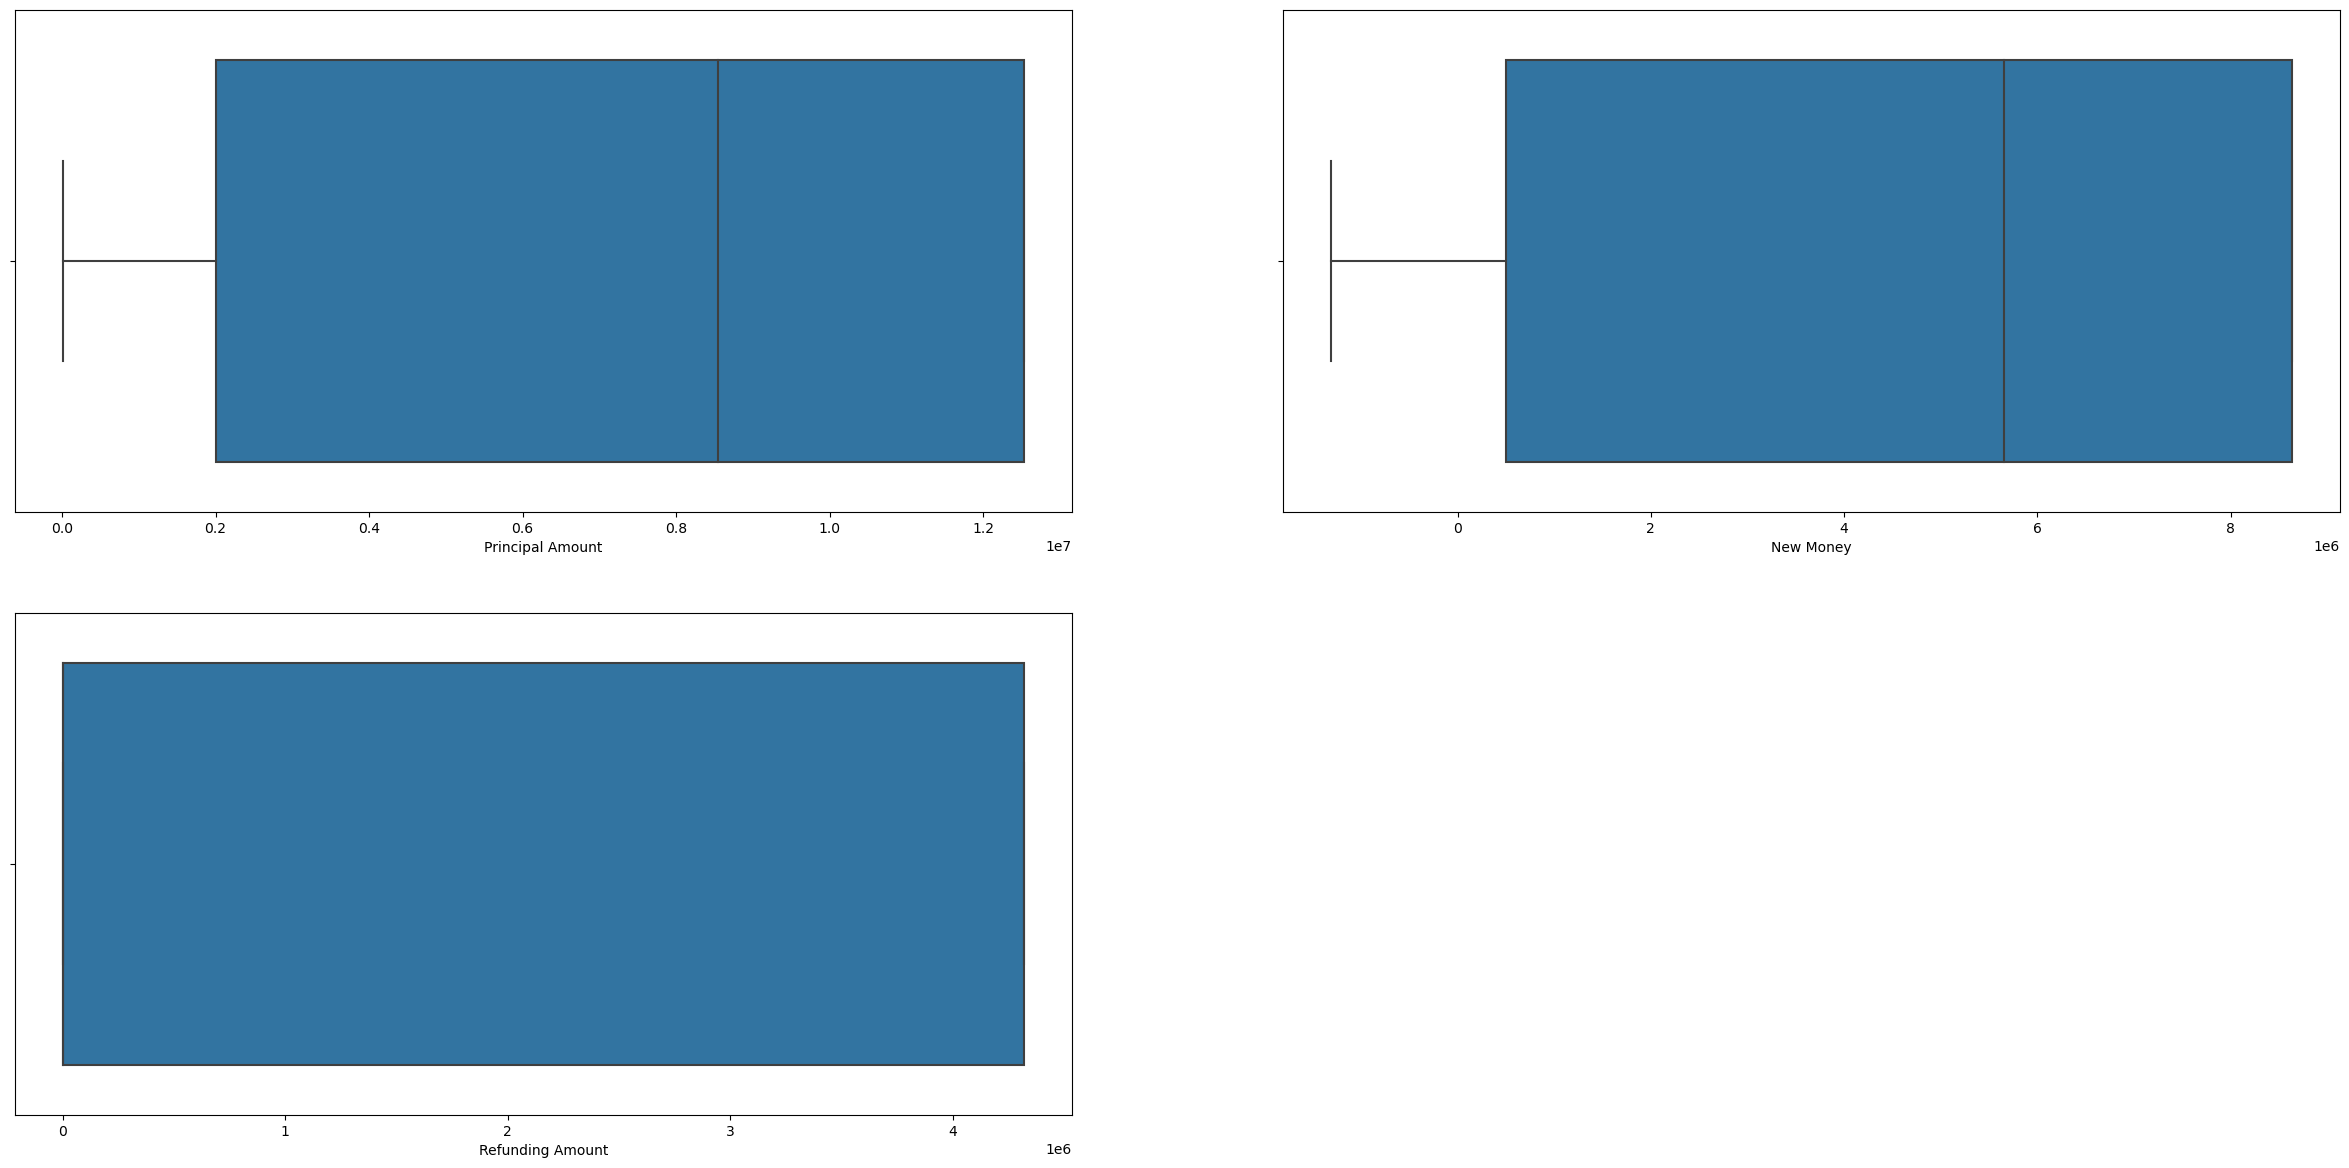

In [56]:
plt.figure(figsize=(30,30))
plt.subplot(4,2,1)
sns.boxplot(df["Principal Amount"])
plt.subplot(4,2,2)
sns.boxplot(df["New Money"])
plt.subplot(4,2,3)
sns.boxplot(df["Refunding Amount"])


<AxesSubplot:xlabel='Total Issuance Costs'>

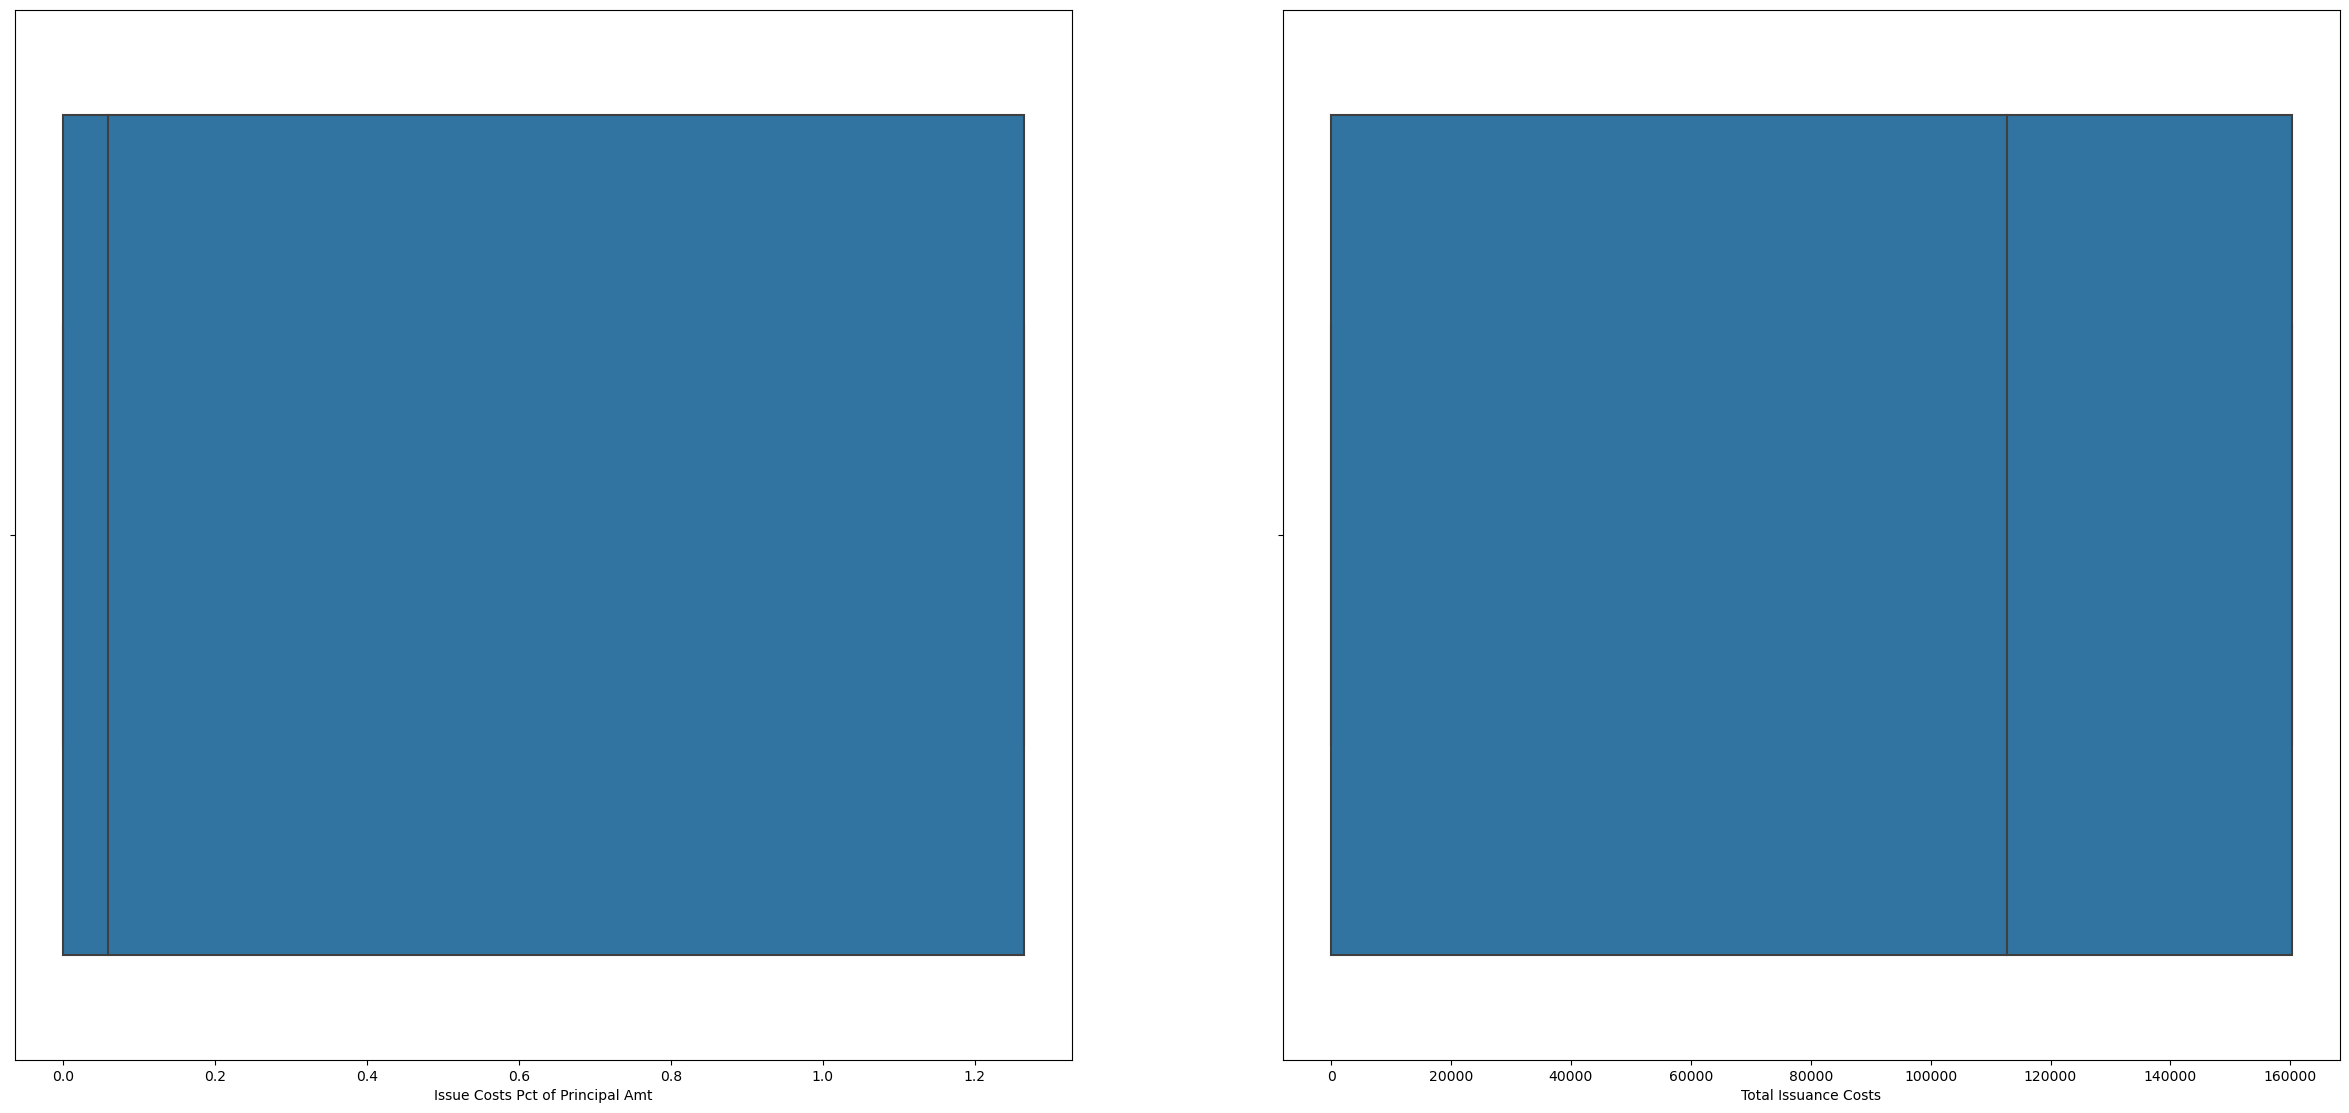

In [57]:
plt.figure(figsize=(30,30))


plt.subplot(2,2,3)
sns.boxplot(df["Issue Costs Pct of Principal Amt"])
plt.subplot(2,2,4)
sns.boxplot(df["Total Issuance Costs"])

### As we can see that the 4 5 6 graphs are showing outliers on the tail of the barplot its reason is as followes:
It means that they are relatively high values compared to the rest of the data.

so we will use quantile method to remove the tail outliers


## As we can see that the data is clean and we can proceed towards visualization part 

# Data Visualization

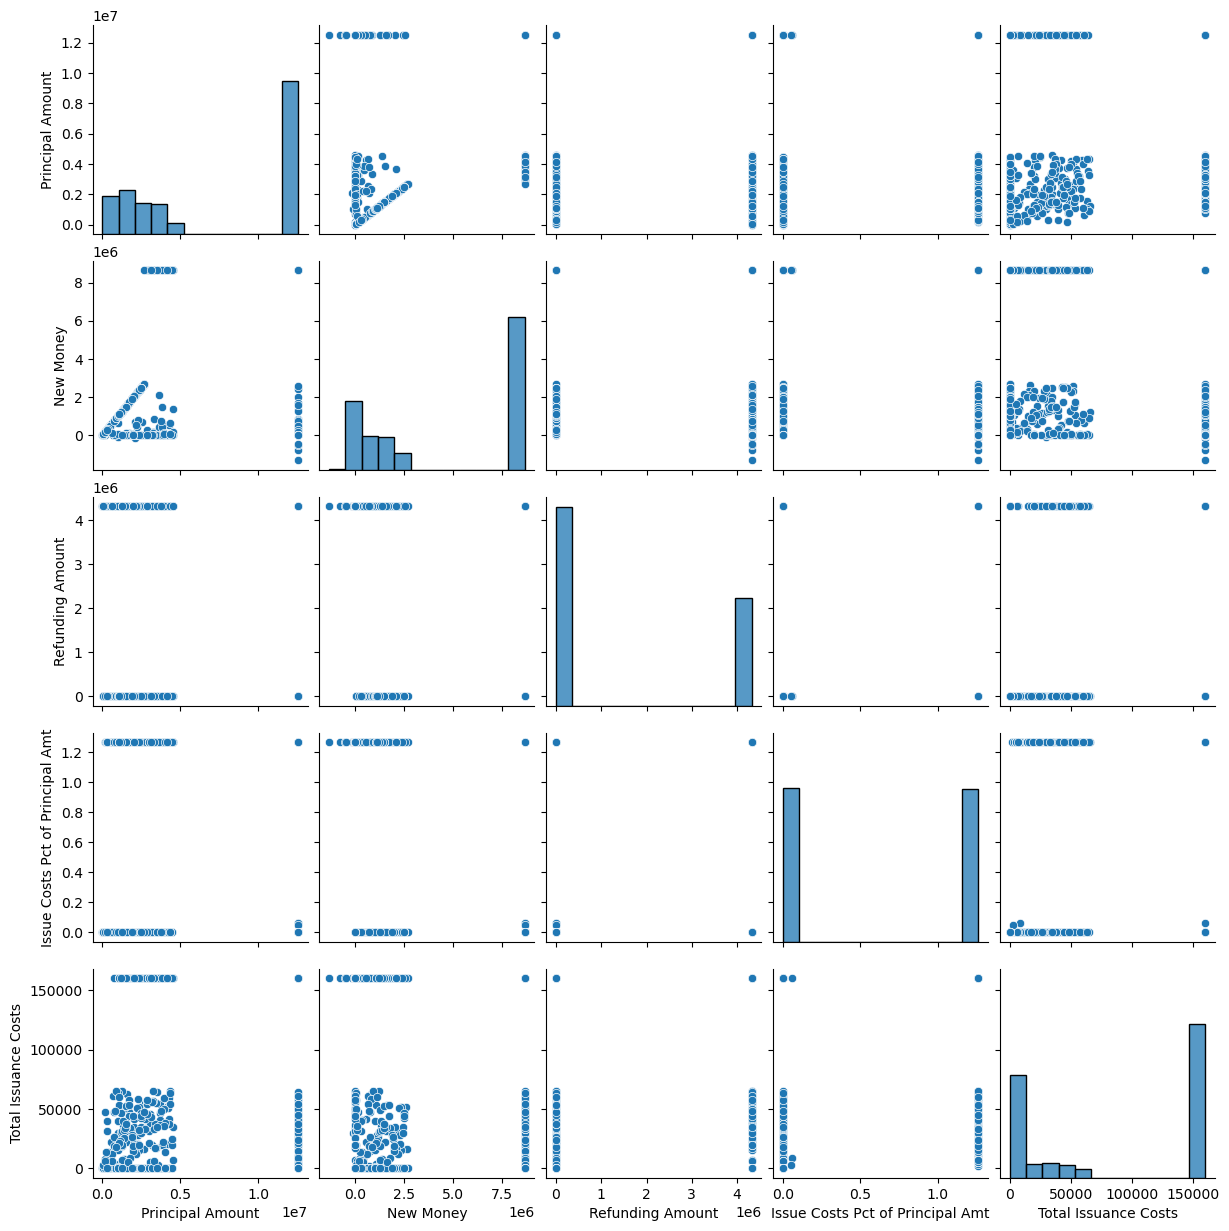

In [58]:
sns.pairplot(df)

<AxesSubplot:xlabel='Issuance Documents', ylabel='count'>

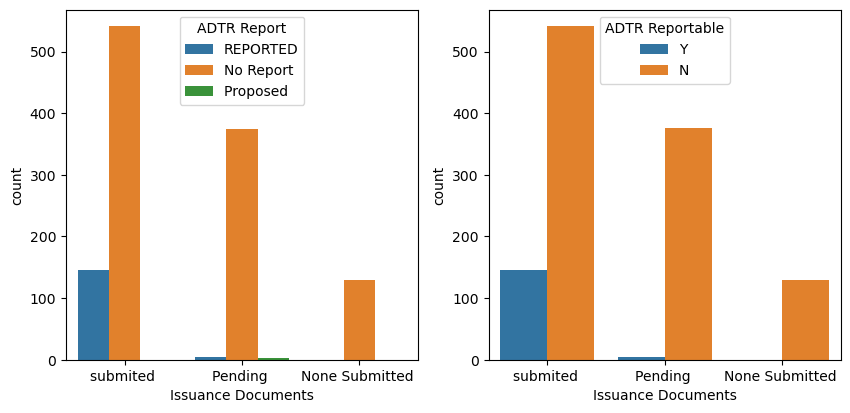

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot("Issuance Documents",hue="ADTR Report",data=df)
plt.subplot(2,2,2)
sns.countplot("Issuance Documents",hue="ADTR Reportable",data=df)




## insights: 

1.  As we can see that the or organization who submited but not reported for ADTR report(annual debt transparancy report) is higher as compared to the organization who submited the report.

   this means that investers can only invest in 150 bonds for now as per the data provided for now. for non reported bonds the credit      ratings will not be available for now as per data

   for pending and non submitted non reported organizations are high in no.
   



2.  As we can see that the no. organizations whose issuance docs are submited but ADTR is not repotable are higher as compared to reportable ADTR organizations this means there are only 150 bonds in which investers can invest other than that all are high risk bonds for now


3. as we can see that the organization who have submited there issuance docs. but are not reportable will be able to report for ADTR by next fiscal year same goes for pending and non-submited 



<AxesSubplot:xlabel='Local Obligation', ylabel='count'>

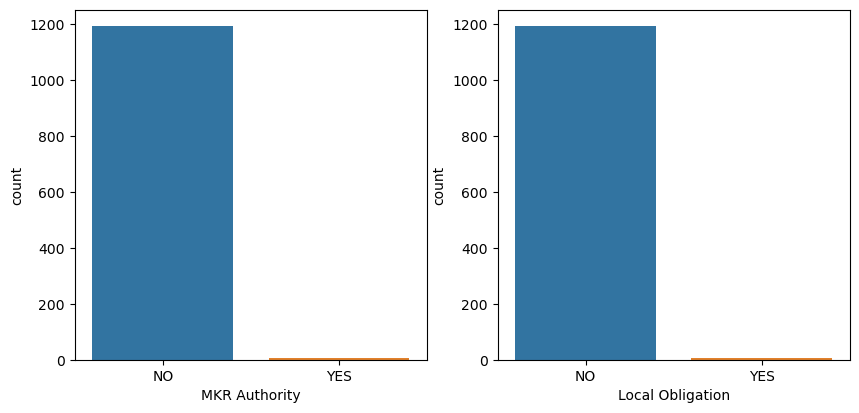

In [60]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df["MKR Authority"])
plt.subplot(2,2,2)
sns.countplot(df["Local Obligation"])

# insights:

1. MKR : Maker typically refers to a corporation, government, or other organization that seeks to raise capital by issuing debt      securities in the form of bonds. The Maker uses the proceeds from the sale of bonds to fund its operations, pay off   existing    debt, or for other purposes.

   MKR authority signifies the issuar of the bond

   as we can see that the rate of no is higher as compared to yes this means investing in the for now is highly volatile as the data because issuer is not a Municipal Bond insurer or Municipal Bond Rating Agency.
   
   
2. As we can see in second graph in local obligation is high whic means that the bond is not tied to a kern county local area or jurisdiction, but rather has a broader, national reach.

<AxesSubplot:xlabel='Issuer Group', ylabel='count'>

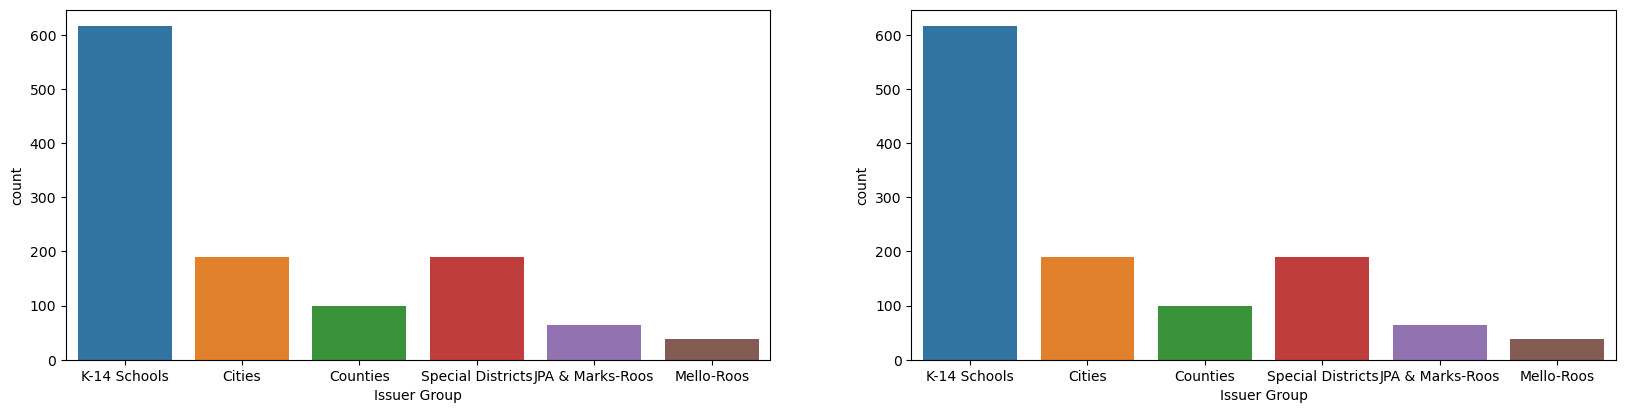

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(df["Issuer Group"])
plt.subplot(2,2,2)
sns.countplot(df["Issuer Group"])

## Insights:

1. As we can see that the of schools in issuer group is higher as compared to government 

2. jpa & marks-ross is bond which inlude mutiple govenment project in single bond 

3. mello roos is a tax district in california which helps community project whith financing

<AxesSubplot:xlabel='S and P Rating', ylabel='count'>

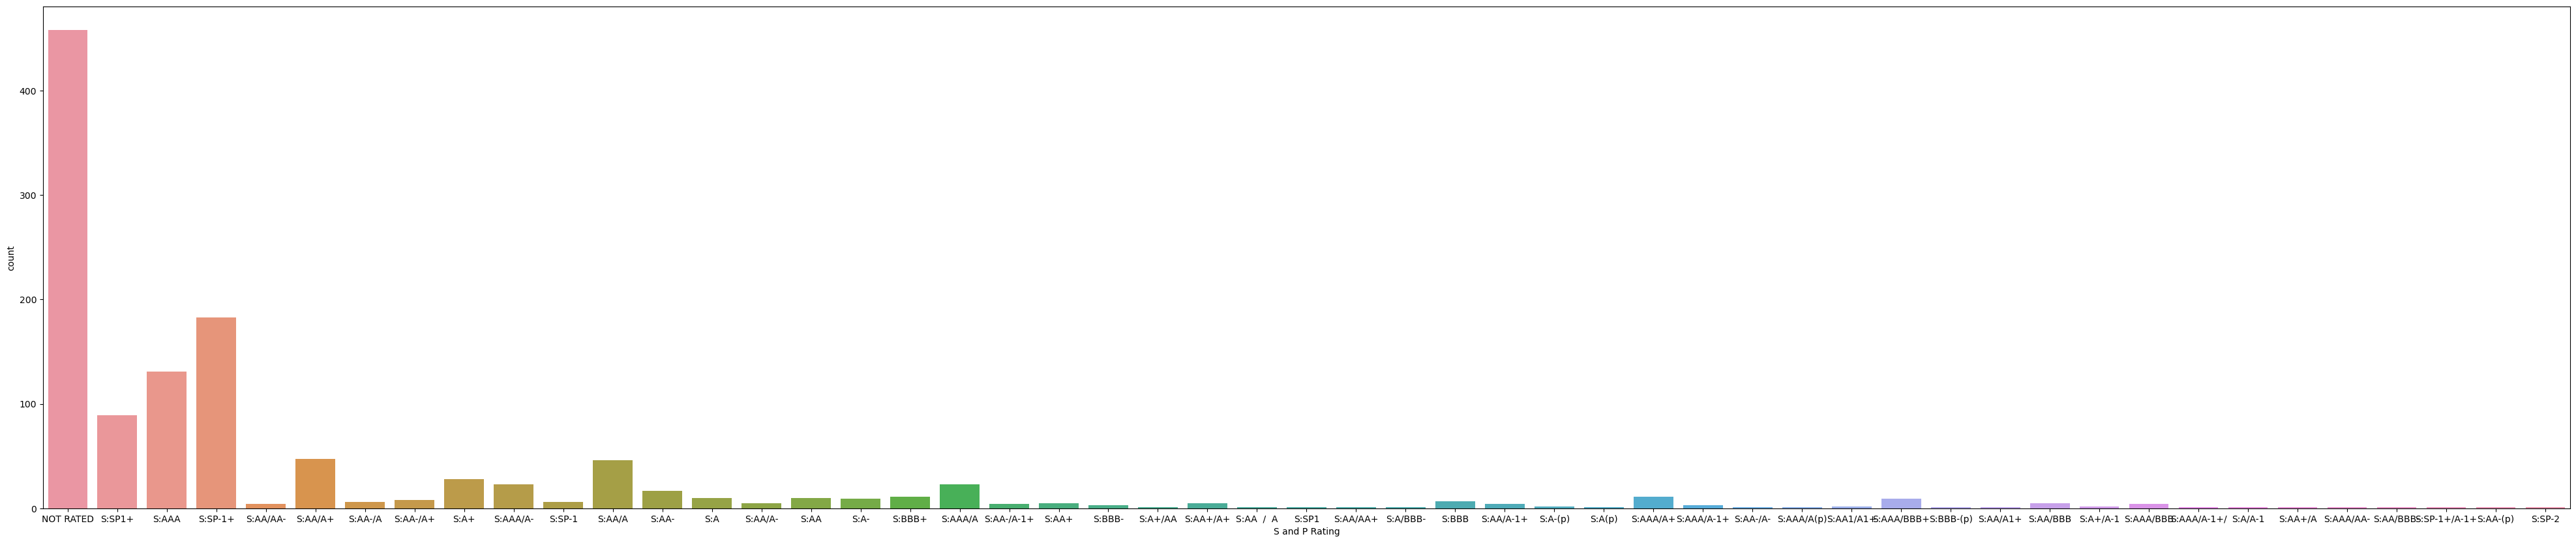

In [62]:
plt.figure(figsize=(50,10))
sns.countplot(df["S and P Rating"])

# Insights:

1. As we can see that non rated organization are higher in no. . as we saw in the graph before most of the organization will be gettng their ADTR report next fiscal year

2. But still the count of organizations with good ratings is high

<AxesSubplot:xlabel='S and P Rating', ylabel='Principal Amount'>

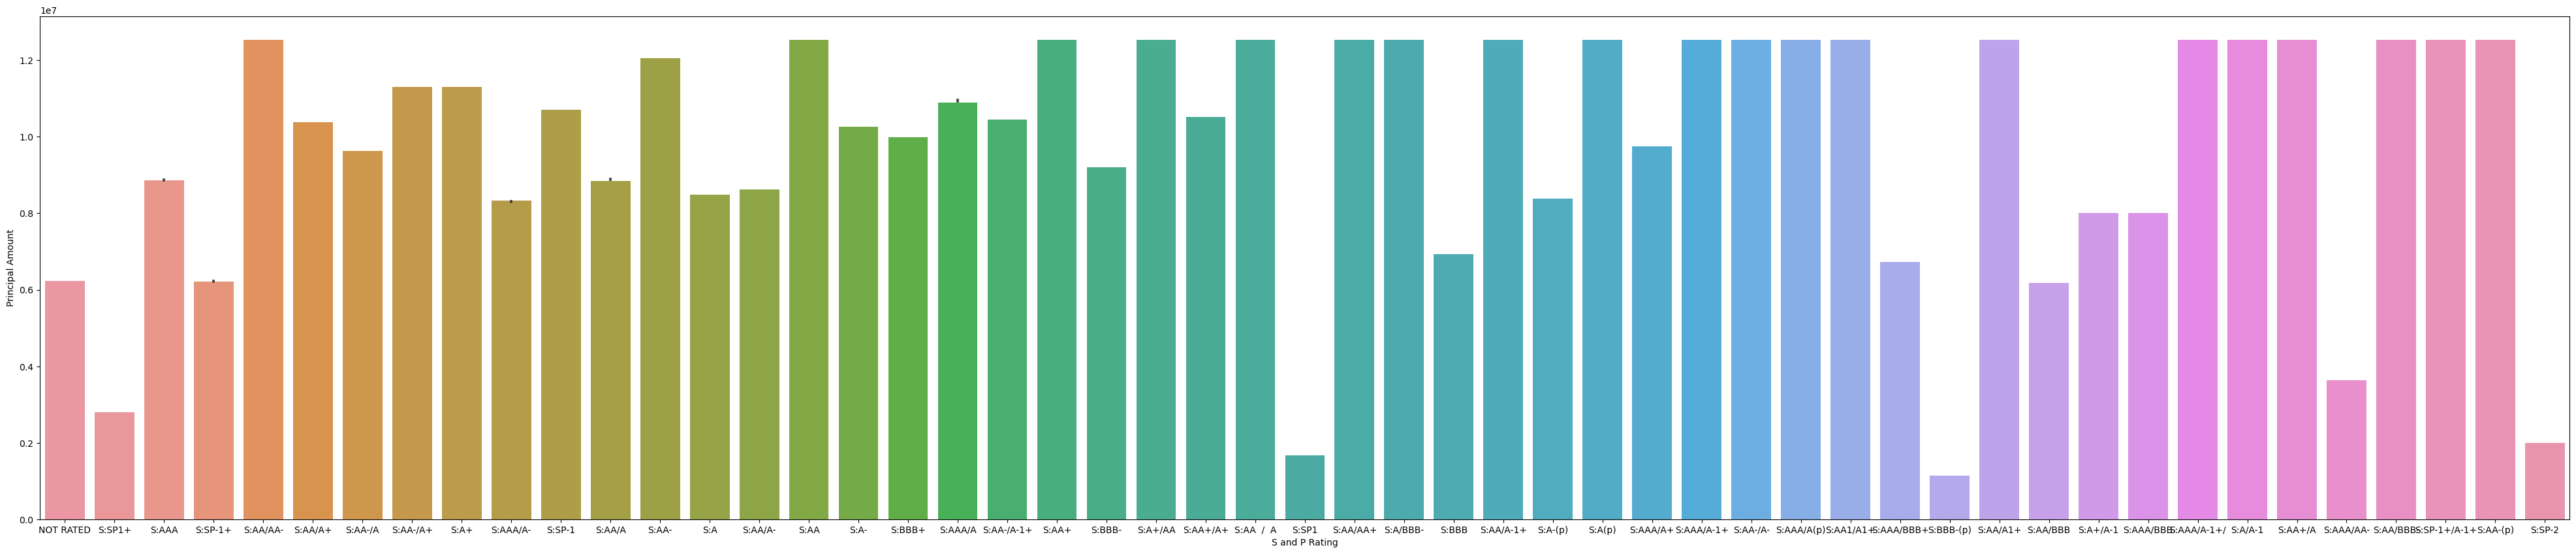

In [63]:
plt.figure(figsize=(50,10))
sns.barplot("S and P Rating","Principal Amount",data=df,ci=True)


# Insight:

1. pricipal amount is properly distributed among all the organizations

<AxesSubplot:xlabel='CAB Flag', ylabel='count'>

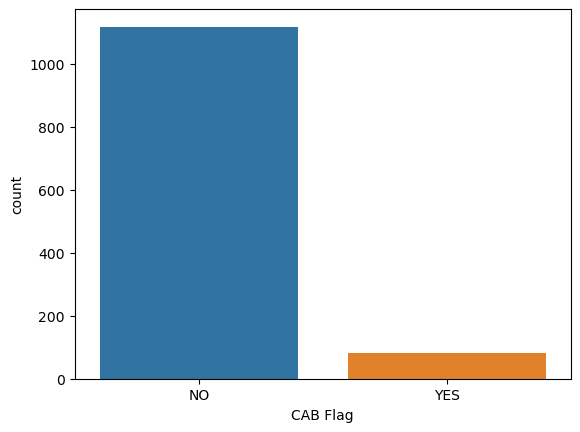

In [64]:
sns.countplot("CAB Flag",data=df)

# Insights:

1. as we can see that the rate of no in CAB (call away bond) is higher as compared to yes
   
   whch means that in most of the bond issuer can not call or take the bond out even if the issuer have good cedit score 
   or issuer feels there is a financial risk in proceeding ahead


<AxesSubplot:xlabel='S and P Rating', ylabel='Count'>

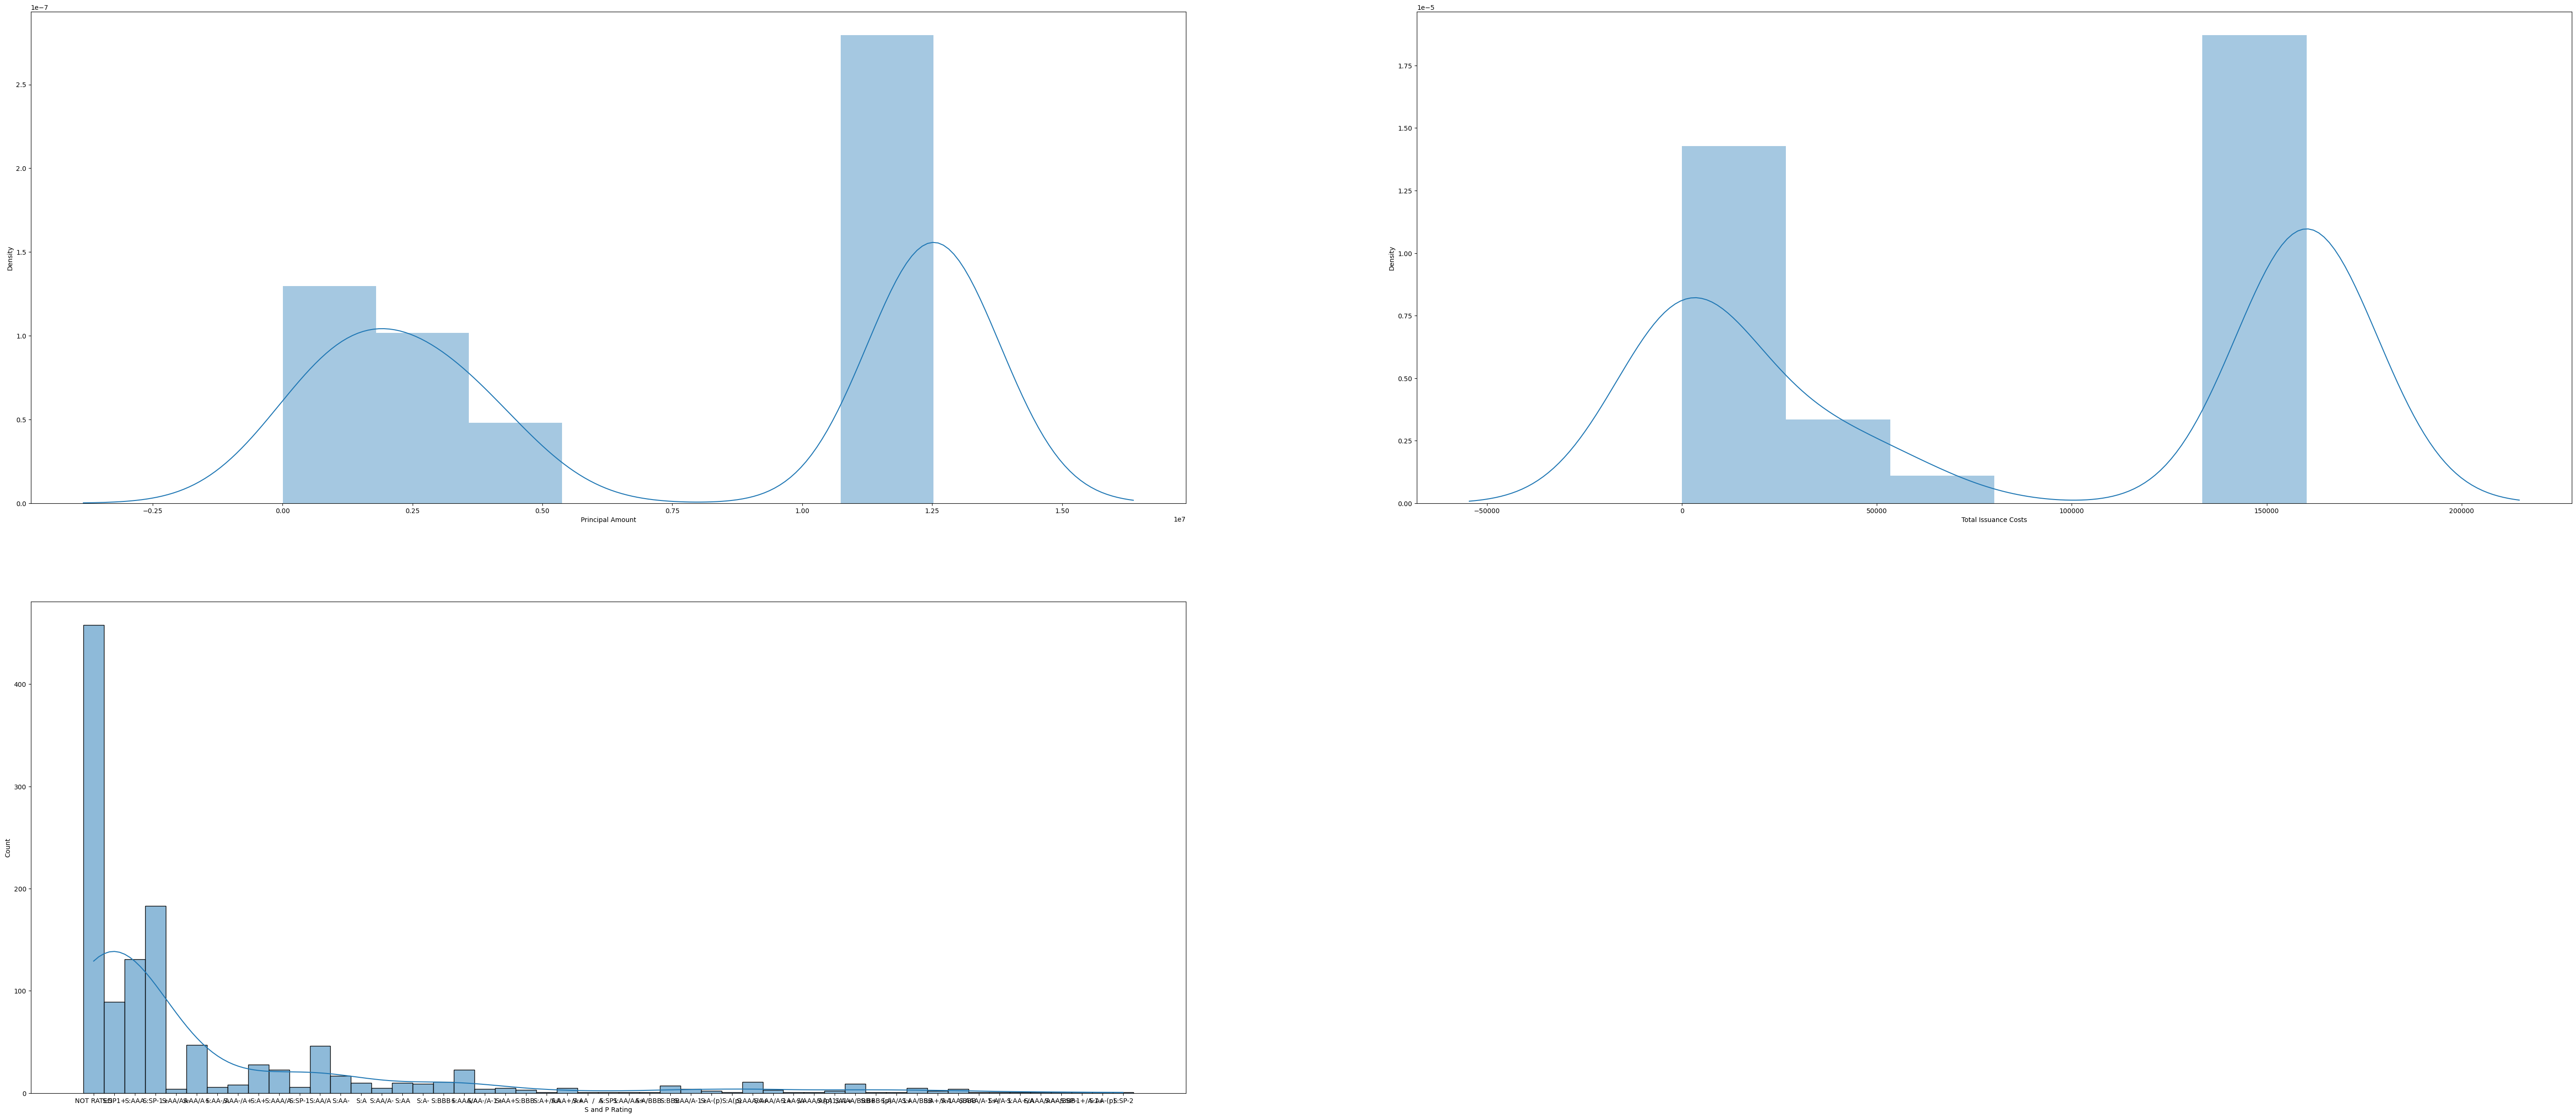

In [65]:
plt.figure(figsize=(70,30))
plt.subplot(2,2,1)
sns.distplot(df["Principal Amount"])
plt.subplot(2,2,2)
sns.distplot(df["Total Issuance Costs"])
plt.subplot(2,2,3)
sns.histplot(df["S and P Rating"],kde=True)


### As we can see taht the data is not normally distributed and it is having a huge range seo we have to standardize it 

# Encoding

In [66]:
le=LabelEncoder()
df["Issuance Documents"]=le.fit_transform(df["Issuance Documents"])
df["Sold Status"]=le.fit_transform(df["Sold Status"])
df["ADTR Report"]=le.fit_transform(df["ADTR Report"])
df["ADTR Filing Status"]=le.fit_transform(df["ADTR Filing Status"])
df["ADTR Reportable"]=le.fit_transform(df["ADTR Reportable"])
df["Sold Status"]=le.fit_transform(df["Sold Status"])

df["ADTR Last Reported Year"]=le.fit_transform(df["ADTR Last Reported Year"])
df["Debt Policy"]=le.fit_transform(df["Debt Policy"])
df["Sold Status"]=le.fit_transform(df["Sold Status"])
df["MKR Authority"]=le.fit_transform(df["MKR Authority"])
df["Local Obligation"]=le.fit_transform(df["Local Obligation"])
df["Issuer Group"]=le.fit_transform(df["Issuer Group"])
df["Issuer Type"]=le.fit_transform(df["Issuer Type"])
df["Environmental/Social Impact Bonds"]=le.fit_transform(df["Environmental/Social Impact Bonds"])
df["Debt Type"]=le.fit_transform(df["Debt Type"])

df["Purpose"]=le.fit_transform(df["Purpose"])
df["Source of Repayment"]=le.fit_transform(df["Source of Repayment"])
df["Interest Type"]=le.fit_transform(df["Interest Type"])
df["Other Interest Type"]=le.fit_transform(df["Other Interest Type"])
df["Federally Taxable"]=le.fit_transform(df["Federally Taxable"])

df["CAB Flag"]=le.fit_transform(df["CAB Flag"])
df["S and P Rating"]=le.fit_transform(df["S and P Rating"])
df["Moody Rating"]=le.fit_transform(df["Moody Rating"])
df["Guarantor Flag"]=le.fit_transform(df["Guarantor Flag"])
df["Guarantor"]=le.fit_transform(df["Guarantor"])
df["Sale Type (Comp/Neg)"]=le.fit_transform(df["Sale Type (Comp/Neg)"])
df["Private Placement Flag"]=le.fit_transform(df["Private Placement Flag"])


In [67]:
ohe=pd.get_dummies(df,columns=["Underwriter","Total Issuance Costs","Disclosure Counsel","Bond Counsel","Financial Advisor","Placement Agent","Purchaser","Final Maturity Date","First Optional Call Date"])
df=ohe
df

,Issuance Documents,Sold Status,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Last Reported Year,Debt Policy,MKR Authority,Local Obligation,Issuer Group,...,First Optional Call Date_12-01-2022 00:00,First Optional Call Date_12-01-2024 00:00,First Optional Call Date_12-01-2025 00:00,First Optional Call Date_12-01-2027 00:00,First Optional Call Date_12-01-2030 00:00,First Optional Call Date_12-08-2020 00:00,First Optional Call Date_12/15/2009 12:00:00 AM,First Optional Call Date_12/22/2016 12:00:00 AM,First Optional Call Date_12/23/2008 12:00:00 AM,First Optional Call Date_12/26/2019 12:00:00 AM
0,2,1,2,3,1,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,3,1,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,1,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,1,0,1,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1196,1,1,0,1,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1197,1,1,0,1,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,2,1,0,1,0,3,1,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.nunique()

Issuance Documents                                 3
Sold Status                                        2
ADTR Report                                        3
ADTR Filing Status                                 4
ADTR Reportable                                    2
                                                  ..
First Optional Call Date_12-08-2020 00:00          2
First Optional Call Date_12/15/2009 12:00:00 AM    2
First Optional Call Date_12/22/2016 12:00:00 AM    2
First Optional Call Date_12/23/2008 12:00:00 AM    2
First Optional Call Date_12/26/2019 12:00:00 AM    2
Length: 1302, dtype: int64

# Corellation 

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
df.corr()

,Issuance Documents,Sold Status,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Last Reported Year,Debt Policy,MKR Authority,Local Obligation,Issuer Group,...,First Optional Call Date_12-01-2022 00:00,First Optional Call Date_12-01-2024 00:00,First Optional Call Date_12-01-2025 00:00,First Optional Call Date_12-01-2027 00:00,First Optional Call Date_12-01-2030 00:00,First Optional Call Date_12-08-2020 00:00,First Optional Call Date_12/15/2009 12:00:00 AM,First Optional Call Date_12/22/2016 12:00:00 AM,First Optional Call Date_12/23/2008 12:00:00 AM,First Optional Call Date_12/26/2019 12:00:00 AM
Issuance Documents,1.000000,0.027858,0.277328,0.232318,0.279301,-0.126094,-0.058484,0.055621,0.028009,0.196380,...,0.032059,0.045376,0.032059,0.022660,0.022660,0.032059,0.022660,0.022660,0.022660,0.022660
Sold Status,0.027858,1.000000,-0.045929,0.012459,0.015530,-0.007339,0.220982,0.002901,0.003135,-0.035899,...,0.001672,0.002367,0.001672,0.001182,0.001182,0.001672,0.001182,0.001182,0.001182,0.001182
ADTR Report,0.277328,-0.045929,1.000000,0.912576,0.998111,-0.351646,-0.199706,0.150873,0.102590,0.124073,...,0.045929,0.108565,-0.015618,0.075966,0.075966,0.107476,-0.011039,-0.011039,-0.011039,0.075966
ADTR Filing Status,0.232318,0.012459,0.912576,1.000000,0.914196,-0.122844,-0.184403,0.104703,0.035141,0.063126,...,0.060349,0.059655,-0.012459,0.042655,0.042655,0.060349,-0.008806,-0.008806,-0.008806,0.042655
ADTR Reportable,0.279301,0.015530,0.998111,0.914196,1.000000,-0.352426,-0.186303,0.151192,0.102878,0.121982,...,0.046075,0.108812,-0.015530,0.076109,0.076109,0.107680,-0.010977,-0.010977,-0.010977,0.076109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
First Optional Call Date_12-08-2020 00:00,0.032059,0.001672,0.107476,0.060349,0.107680,-0.155483,0.003752,-0.002901,-0.003135,-0.017393,...,-0.001672,-0.002367,-0.001672,-0.001182,-0.001182,1.000000,-0.001182,-0.001182,-0.001182,-0.001182
First Optional Call Date_12/15/2009 12:00:00 AM,0.022660,0.001182,-0.011039,-0.008806,-0.010977,0.005187,0.002652,-0.002051,-0.002216,0.044208,...,-0.001182,-0.001673,-0.001182,-0.000835,-0.000835,-0.001182,1.000000,-0.000835,-0.000835,-0.000835
First Optional Call Date_12/22/2016 12:00:00 AM,0.022660,0.001182,-0.011039,-0.008806,-0.010977,0.005187,0.002652,-0.002051,-0.002216,0.044208,...,-0.001182,-0.001673,-0.001182,-0.000835,-0.000835,-0.001182,-0.000835,1.000000,-0.000835,-0.000835
First Optional Call Date_12/23/2008 12:00:00 AM,0.022660,0.001182,-0.011039,-0.008806,-0.010977,0.005187,0.002652,-0.002051,-0.002216,0.006540,...,-0.001182,-0.001673,-0.001182,-0.000835,-0.000835,-0.001182,-0.000835,-0.000835,1.000000,-0.000835


# train_test_split

In [70]:
x=df.drop("S and P Rating",axis=1)
y=df["S and P Rating"]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.700,random_state=100)

# zscore normalization

In [72]:
mean = df.mean()
std = df.std()
df = (df - mean) / std
df

,Issuance Documents,Sold Status,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Last Reported Year,Debt Policy,MKR Authority,Local Obligation,Issuer Group,...,First Optional Call Date_12-01-2022 00:00,First Optional Call Date_12-01-2024 00:00,First Optional Call Date_12-01-2025 00:00,First Optional Call Date_12-01-2027 00:00,First Optional Call Date_12-01-2030 00:00,First Optional Call Date_12-08-2020 00:00,First Optional Call Date_12/15/2009 12:00:00 AM,First Optional Call Date_12/22/2016 12:00:00 AM,First Optional Call Date_12/23/2008 12:00:00 AM,First Optional Call Date_12/26/2019 12:00:00 AM
0,0.783647,0.040876,2.627135,3.25486,2.632107,0.179399,0.091709,-0.070918,-0.076632,0.226173,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
1,-0.680954,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,0.226173,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
2,0.783647,0.040876,2.627135,3.25486,2.632107,0.179399,0.091709,-0.070918,-0.076632,0.226173,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
3,0.783647,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,-1.727828,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
4,-0.680954,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,-1.076495,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.783647,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,0.226173,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
1196,-0.680954,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,0.226173,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
1197,-0.680954,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,-1.727828,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892
1198,0.783647,0.040876,-0.381763,-0.30454,-0.379607,0.179399,0.091709,-0.070918,-0.076632,1.528840,...,-0.040876,-0.057856,-0.040876,-0.028892,-0.028892,-0.040876,-0.028892,-0.028892,-0.028892,-0.028892


# Model building

### 1. linear regression model: 

In [73]:
lr= LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
y_pred=lr.predict(x_test)

In [76]:
r2=r2_score(y_test,y_pred)
r2

-2545768.6466048327

### using gridsearchcv to improve r2 score

In [77]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [78]:
params={"n_jobs":[5,20,30],"positive":[True],"fit_intercept":[False],"copy_X":[False,True]}
lrt=GridSearchCV(lr,params,cv=7,verbose=1,scoring='r2')
lrt.fit(x_train,y_train)

Fitting 7 folds for each of 6 candidates, totalling 42 fits


GridSearchCV(cv=7, estimator=LinearRegression(),
             param_grid={'copy_X': [False, True], 'fit_intercept': [False],
                         'n_jobs': [5, 20, 30], 'positive': [True]},
             scoring='r2', verbose=1)

In [79]:
lrt.best_score_

0.23832445204531277

In [80]:
lrt.best_params_

{'copy_X': False, 'fit_intercept': False, 'n_jobs': 5, 'positive': True}

### 2. ridge regression 

In [81]:
ridge=Ridge()
ridge.get_params()
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [82]:
r_2=r2_score(y_test,y_pred_ridge)
r_2

0.5982772629653259

### using gridsearchcv to improve r2 score

In [83]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [84]:
params={"max_iter":[3,5,20],"positive":[True,False],"fit_intercept":[True,False],"copy_X":[True,False],"random_state":[10,20,30,45],"tol":[0.0003,0.0005,0.0002,0.0001],"alpha":[1.0,2.0,4.0,5.0]}
ridgetu=GridSearchCV(ridge,params,cv=4,verbose=1,n_jobs=20,scoring='r2')
ridgetu.fit(x_train,y_train)

Fitting 4 folds for each of 1536 candidates, totalling 6144 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=20,
             param_grid={'alpha': [1.0, 2.0, 4.0, 5.0], 'copy_X': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [3, 5, 20],
                         'positive': [True, False],
                         'random_state': [10, 20, 30, 45],
                         'tol': [0.0003, 0.0005, 0.0002, 0.0001]},
             scoring='r2', verbose=1)

In [85]:
ridgetu.best_score_

0.6057072416861131

In [86]:
ridgetu.best_params_

{'alpha': 5.0,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 3,
 'positive': False,
 'random_state': 10,
 'tol': 0.0003}

## 3. lasso regression 

In [87]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [88]:
y_pred_lasso = lasso.predict(x_test)

In [89]:
r_2=r2_score(y_test,y_pred_lasso)
r_2

0.48015619366575135

### using gridsearchcv to improve r2 score 

In [90]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [91]:
params={"alpha":[1.0,2.0,3.0,4.0],"max_iter":[100,500,1000],"random_state":[30,45],"fit_intercept":[True,False],"copy_X":[True,False],"positive":[True,False],"precompute":[True,False],"tol":[0.0003,0.0005,0.0002,0.0001]}
lass=GridSearchCV(lasso,params,cv=4,n_jobs=20,scoring='r2')
lass.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(), n_jobs=20,
             param_grid={'alpha': [1.0, 2.0, 3.0, 4.0], 'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000],
                         'positive': [True, False], 'precompute': [True, False],
                         'random_state': [30, 45],
                         'tol': [0.0003, 0.0005, 0.0002, 0.0001]},
             scoring='r2')

In [92]:
lass.best_score_

0.48653717075366076

In [93]:
lass.best_params_

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100,
 'positive': False,
 'precompute': True,
 'random_state': 30,
 'tol': 0.0001}

# 4. adaboost regressor

In [94]:
ada=AdaBoostRegressor()

In [95]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [96]:
y_pred_adb = ada.predict(x_test)

In [97]:
r_2=r2_score(y_test,y_pred_adb)
r_2

0.5807366918340197

### using gridsearchcv to improve r2 score

In [98]:
ada.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [99]:
params={"learning_rate":[1.0,2.0,3.0,4.0],"random_state":[30,45,60,64],'n_estimators':[3,5,10,20,30,40,50,70]}
adat=GridSearchCV(ada,params,cv=3,n_jobs=5,verbose=1,scoring='r2')
adat.fit(x_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=5,
             param_grid={'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': [3, 5, 10, 20, 30, 40, 50, 70],
                         'random_state': [30, 45, 60, 64]},
             scoring='r2', verbose=1)

In [100]:
adat.best_score_

0.652097756607407

In [101]:
adat.best_params_

{'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 30}

## 5. decision tree regressor 

In [102]:
dtcr=DecisionTreeRegressor()
dtcr.fit(x_train,y_train)


DecisionTreeRegressor()

In [103]:
y_pred_dtcr=dtcr.predict(x_test)

In [104]:
r2=r2_score(y_test,y_pred_dtcr)
r2

0.6494079829434429

### using gridsearchcv to improve r2 score  

In [105]:
dtcr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [106]:
params={"max_depth":[10,20,30,40],"random_state":[20,40],'min_impurity_decrease':[1,2,3,4],"min_samples_leaf":[1,2,3,4,5],"min_samples_split":[2,3,4,5,6],"ccp_alpha":[0.5,0.6,0.7]}
dtcrt=GridSearchCV(dtcr,params,cv=5,n_jobs=5,verbose=1,scoring='r2')
dtcrt.fit(x_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'ccp_alpha': [0.5, 0.6, 0.7],
                         'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'random_state': [20, 40]},
             scoring='r2', verbose=1)

In [107]:
dtcrt.best_params_

{'ccp_alpha': 0.5,
 'max_depth': 10,
 'min_impurity_decrease': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'random_state': 40}

In [108]:
dtcrt.best_score_

0.6491684757048557

# 6. random forest regressor

In [109]:
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [110]:
y_pred_rf=rfr.predict(x_test)

In [111]:
r2=r2_score(y_test,y_pred_rf)
r2

0.8054613972729647

### using gridsearchcv to improve r2 score

In [116]:
params={"max_depth":[100,200],"min_samples_split":[3,5],"min_impurity_decrease":[0.5,1.0],
        "n_estimators":[200,500],"random_state":[10,20,40],"bootstrap":[True],"oob_score":[True]}
rfrt=GridSearchCV(rfr,params,cv=5,n_jobs=20,verbose=1,scoring="r2")
rfrt.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=20,
             param_grid={'bootstrap': [True], 'max_depth': [100, 200],
                         'min_impurity_decrease': [0.5, 1.0],
                         'min_samples_split': [3, 5],
                         'n_estimators': [200, 500], 'oob_score': [True],
                         'random_state': [10, 20, 40]},
             scoring='r2', verbose=1)

In [117]:
rfrt.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'min_impurity_decrease': 0.5,
 'min_samples_split': 3,
 'n_estimators': 500,
 'oob_score': True,
 'random_state': 20}

In [118]:
rfrt.best_score_

0.7255391911131108

### As we can see that even if we try our best parameters we are getting less accuracy as compared to our default accuracy score

# Accuracy of all the models:

1. linear regression = 0.24
2. Ridge regression = 0.60
3. lasso regression = 0.48
4. Adaboost regression = 0.65
5. decision tree regressor = 0.64
6. Random forest regressor = 0.80 (Before grid search cv)